# Implementation of Bayes Optimization

* The Bayes Optimization algorithm is used for complex optimization problems.
* Usually the objective function is complex and intractable to analyze and is often non-convex (local extrema may or may not be the global extrema), nonlinear, high dimension (defined by the number of input variables), noisy, and computationally expensive to evaluate.
* Bayesian Optimization builds a probabilistic model of the objective function (tune the hyperparameters), called the surrogate function.


Important desciptions:
1. *Samples*: One sample is often defined as a vector of variables with a predefined range in an n-dimensional space.
2. *Cost*: has units that are specific to a given domain. Optimization is often described in terms of minimizing cost.
3. *Objective function*: it is often referred to as a black box function and the search process as black box optimization.

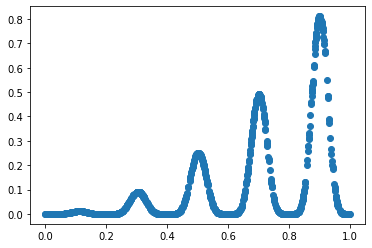

In [15]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt

x = np.random.random(1000)
y =  x**2 * np.sin(5 * pi * x)**6

plt.plot(x,y,'o')
plt.show()